In [1]:
import os
from pathlib import Path

cur_path = Path(os.getcwd())
base_dir = cur_path.parent

dataset_path = os.path.join(base_dir, 'datasets')

train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'val')

train_0_front_dir = os.path.join(train_dir, '0_front')
train_1_back_dir = os.path.join(train_dir, '1_back')
train_1_front_dir = os.path.join(train_dir, '1_front')
train_2_back_dir = os.path.join(train_dir, '2_back')
train_2_front_dir = os.path.join(train_dir, '2_front')
train_5_front_dir = os.path.join(train_dir, '5_front')
train_ILU_dir = os.path.join(train_dir, 'ILU')

val_0_front_dir = os.path.join(val_dir, '0_front')
val_1_back_dir = os.path.join(val_dir, '1_back')
val_1_front_dir = os.path.join(val_dir, '1_front')
val_2_back_dir = os.path.join(val_dir, '2_back')
val_2_front_dir = os.path.join(val_dir, '2_front')
val_5_front_dir = os.path.join(val_dir, '5_front')
val_ILU_dir = os.path.join(val_dir, 'ILU')

save_dir = os.path.join(base_dir, 'saved_models')

In [2]:
import tensorflow as tf

from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers

h = 150 # height
w = 150 # width
c = 3  # channels
num_classes = 7

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(h, w, c))
vgg16.trainable = False

model = models.Sequential()
model.add(vgg16)

model.add(layers.Flatten())

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))

# model.add(layers.Dense(512))
# model.add(layers.ReLU())
# model.add(layers.Dropout(0.5))
# model.add(layers.BatchNormalization())

# model.add(layers.Dense(512))
# model.add(layers.ReLU())
# model.add(layers.Dropout(0.5))
# model.add(layers.BatchNormalization())


model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.3, 
                                   height_shift_range=0.2,
                                   shear_range=0.4,
                                   zoom_range=[1, 2],
                                   brightness_range=[1.0, 1.6],
                                   fill_mode='nearest')


val_datagen = ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 width_shift_range=0.3, 
                                 height_shift_range=0.2,
                                 shear_range=0.4,
                                 zoom_range=[1, 2],
                                 brightness_range=[1.0, 1.6],
                                 fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=50)

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(150, 150),
                                                batch_size=50)

Found 1263 images belonging to 7 classes.
Found 490 images belonging to 7 classes.


In [4]:
import numpy as np

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop

callbacks_list = [
    EarlyStopping(
        monitor='val_acc',
        patience=10,
    ),
    ModelCheckpoint(
        filepath=os.path.join(save_dir, 'hand_sign.h5'),
        monitor='val_acc',
        save_best_only=True,
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=5,
        verbose=1
    )
]

model.compile(optimizer=RMSprop(),
              loss='categorical_crossentropy',
              metrics=['acc'])

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
validation_steps = np.ceil(val_generator.samples/val_generator.batch_size)

history = model.fit(train_generator, epochs=100,
                    steps_per_epoch=steps_per_epoch,
                    callbacks=callbacks_list,
                    validation_data=val_generator,
                    validation_steps=validation_steps)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 26.0 steps, validate for 10.0 steps
Epoch 1/100
26/26 [==============================] - 13s 518ms/step - loss: 2.1204 - acc: 0.2668 - val_loss: 1.7476 - val_acc: 0.3184
Epoch 2/100
26/26 [==============================] - 9s 340ms/step - loss: 1.6624 - acc: 0.3856 - val_loss: 1.6307 - val_acc: 0.4388
Epoch 3/100
26/26 [==============================] - 9s 350ms/step - loss: 1.5058 - acc: 0.4458 - val_loss: 1.4802 - val_acc: 0.4776
Epoch 4/100
26/26 [==============================] - 9s 351ms/step - loss: 1.2819 - acc: 0.5178 - val_loss: 1.4943 - val_acc: 0.4755
Epoch 5/100
26/26 [==============================] - 10s 367ms/step - loss: 1.2302 - acc: 0.5384 - val_loss: 1.4335 - val_acc: 0.5204
Epoch 6/100
26/26 [==============================] - 9s 355ms/step - loss: 1.1327 - acc: 0.5772 - val_loss: 1.6097 - val_acc: 0.5102
Epoch 7/100
26/26 [==============================] - 9s 361ms/step - loss: 1.0626 - acc: 0.5891 - val_lo

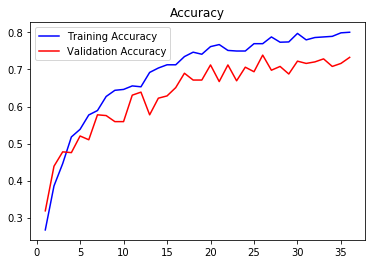

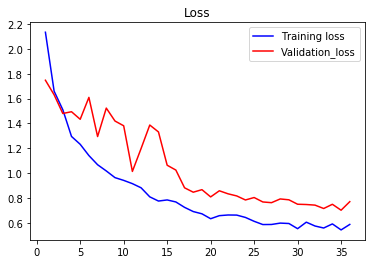

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation_loss')
plt.title('Loss')
plt.legend()

plt.show()

In [6]:
print(len(model.trainable_weights))

vgg16.trainable = True

for layer in vgg16.layers[:-4]:
    layer.trainable = False
    
for layer in vgg16.layers:
    print(layer, layer.trainable)
    
print(len(model.trainable_weights))

10
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fba71e43350> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb9ed597f90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb9ed911890> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb9ecd7cdd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb9ecd7cd10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb9ecd7c510> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb9ec07e710> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb9ec091350> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb9ec096c90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb9ec09bd10> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb9ec0a6a50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object 

In [7]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
validation_steps = np.ceil(val_generator.samples/val_generator.batch_size)

history = model.fit(train_generator, epochs=100,
                    steps_per_epoch=steps_per_epoch,
                    callbacks=callbacks_list,
                    validation_data=val_generator,
                    validation_steps=validation_steps)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 26.0 steps, validate for 10.0 steps
Epoch 1/100
26/26 [==============================] - 10s 388ms/step - loss: 0.7193 - acc: 0.7411 - val_loss: 1.7304 - val_acc: 0.6878
Epoch 2/100
26/26 [==============================] - 9s 353ms/step - loss: 0.4963 - acc: 0.8290 - val_loss: 2.4711 - val_acc: 0.6143
Epoch 3/100
26/26 [==============================] - 10s 369ms/step - loss: 0.4078 - acc: 0.8377 - val_loss: 0.8773 - val_acc: 0.7531
Epoch 4/100
26/26 [==============================] - 9s 361ms/step - loss: 0.3906 - acc: 0.8551 - val_loss: 1.4725 - val_acc: 0.7061
Epoch 5/100
26/26 [==============================] - 10s 370ms/step - loss: 0.3174 - acc: 0.8797 - val_loss: 0.5250 - val_acc: 0.8224
Epoch 6/100
26/26 [==============================] - 10s 366ms/step - loss: 0.2887 - acc: 0.9010 - val_loss: 0.5161 - val_acc: 0.8449
Epoch 7/100
26/26 [==============================] - 9s 345ms/step - loss: 0.2648 - acc: 0.9010 - val_

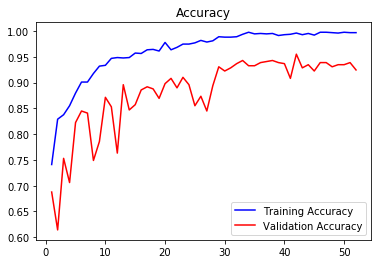

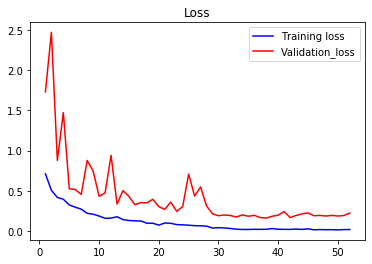

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation_loss')
plt.title('Loss')
plt.legend()

plt.show()